***Movie Genre Classification***

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

!cp '/content/drive/MyDrive/datasets/Genre Classification Dataset/test_data.txt' '/content/'

In [6]:

!cp '/content/drive/MyDrive/datasets/Genre Classification Dataset/train_data.txt' '/content/'

In [7]:
!ls '/content/'

drive  sample_data  test_data.txt  train_data.txt


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Loading the training data
training_data = pd.read_csv('train_data.txt', sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [10]:
# Checking for null values
print(training_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [11]:
print(training_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [12]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [13]:
# Loading the test data
testing_data = pd.read_csv('test_data.txt', sep=':::', names=['Id', 'Title', 'Description'], engine='python')

<ipython-input-14-a36191cd7f35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=training_data, y='Genre', order=training_data['Genre'].value_counts().index, palette='viridis')
<ipython-input-14-a36191cd7f35>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


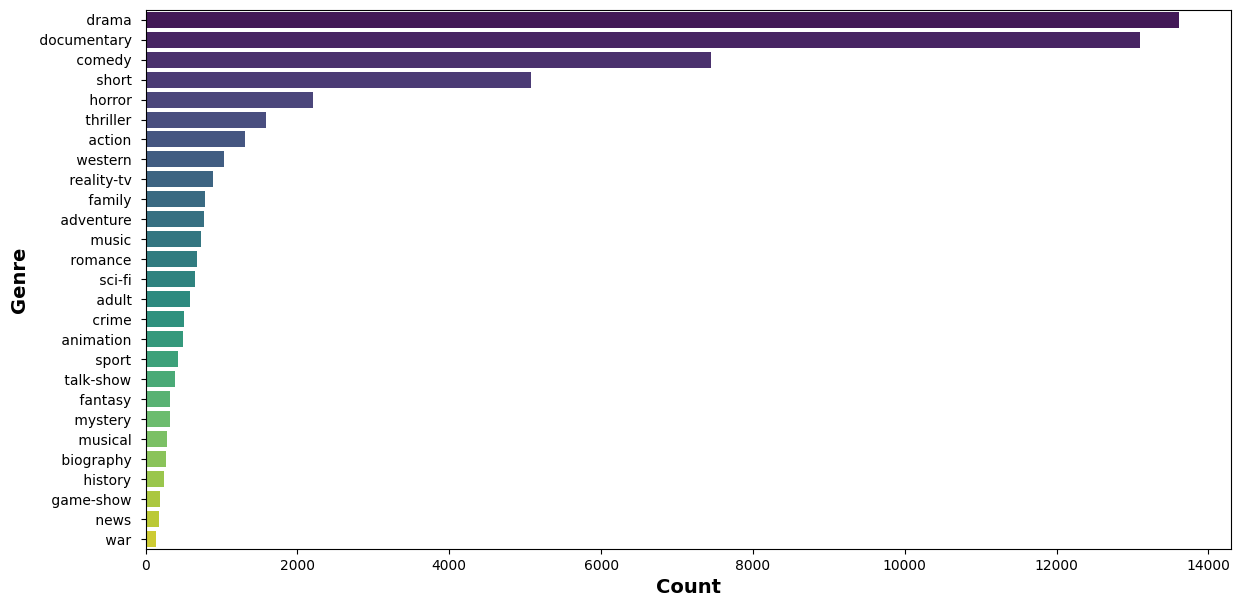

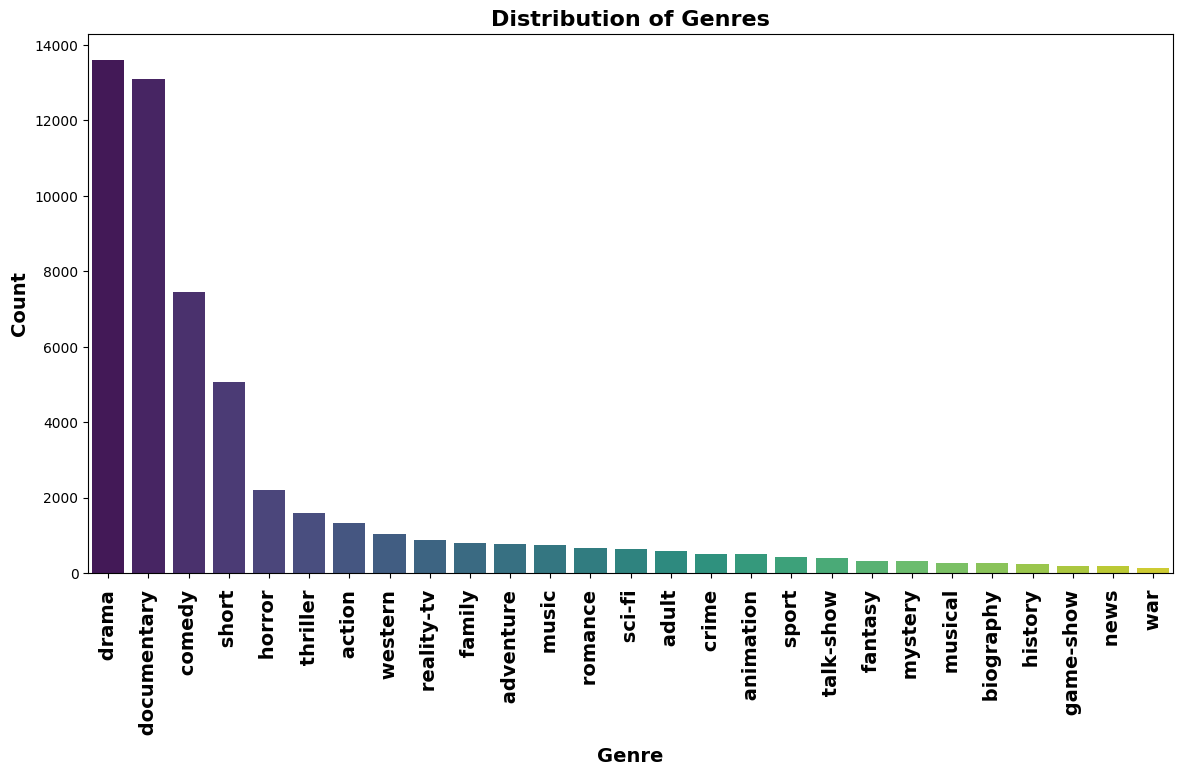

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(data=training_data, y='Genre', order=training_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Visualize the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = training_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [15]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
training_data['Text_cleaning'] = training_data['Description'].apply(clean_text)
testing_data['Text_cleaning'] = testing_data['Description'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


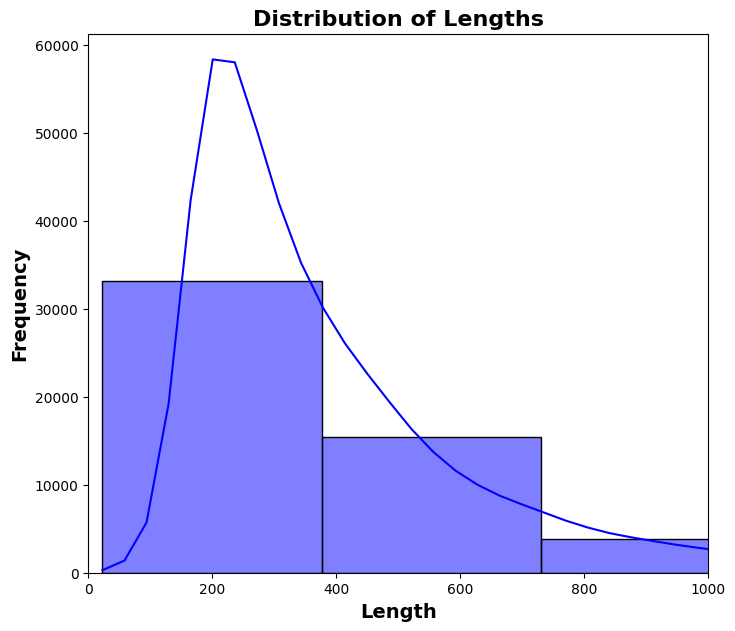

In [16]:
# Calculate the length of cleaned text
training_data['length_Text_cleaning'] = training_data['Text_cleaning'].apply(len)

# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=training_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.xlim(0, 1000)
plt.show()


In [17]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [18]:
# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(training_data['Text_cleaning'])

In [19]:
# Transform the test data
X_test = tfidf_vectorizer.transform(testing_data['Text_cleaning'])

In [20]:
# Split the data into training and validation sets
X = X_train
y = training_data['Genre']
print("X shape:", X.shape)
print("y shape:", y.shape)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

X shape: (54214, 124210)
y shape: (54214,)
Validation Accuracy: 0.44526422576777647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Using the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
testing_data['Predicted_Genre'] = X_test_predictions

In [ ]:
# Saving the testing_data DataFrame with predicted genres to a CSV file
testing_data.to_csv('predicted_genres.csv', index=False)

# Displaying the 'testing_data' DataFrame with predicted genres
print(testing_data)

        Id                                              Title  \
0        1                              Edgar's Lunch (1998)    
1        2                          La guerra de papá (1977)    
2        3                       Off the Beaten Track (2010)    
3        4                            Meu Amigo Hindu (2015)    
4        5                                 Er nu zhai (1955)    
...    ...                                                ...   
1613  1614                   For the Love of Pleasure (1979)    
1614  1615                              Silent Hunter (1995)    
1615  1616                          29 Reasons to Run (2006)    
1616  1617        "Abbey & Janice: Beauty & The Best" (2007)    
1617  1618   Rôjin to rabudôru: Watashi ga shochô ni natta...   

                                            Description  \
0      L.R. Brane loves his life - his car, his apar...   
1      Spain, March 1964: Quico is a very naughty ch...   
2      One year in the life of Albin and h